In [3]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [39]:
df = df.select_dtypes(include = ["float64","int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [40]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

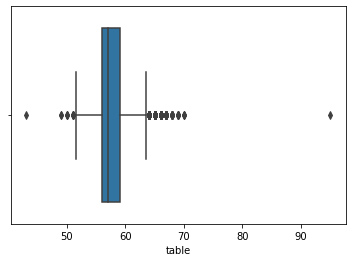

In [7]:
sns.boxplot(x=df_table)

In [46]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
IQR

table    3.0
dtype: float64

In [47]:
alt_sinir = Q1-(1.5*IQR)
alt_sinir

table    51.5
dtype: float64

In [48]:
ust_sinir = Q3+(1.5*IQR)
ust_sinir

table    63.5
dtype: float64

In [49]:
aykiri_tf = (df_table>ust_sinir) | (df_table<alt_sinir)
df_table[aykiri_tf].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            32932, 32933, 32934, 32935, 32936, 32937, 32938, 32939, 32940,
            32941],
           dtype='int64', length=32942)

Silme

In [35]:
import pandas as pd

In [74]:
df_table = pd.DataFrame(df_table)
df_table.shape

(32942, 1)

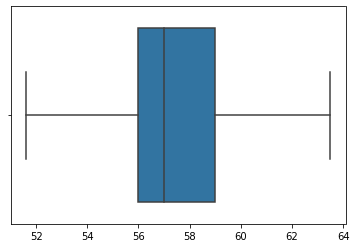

In [122]:
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)]
t_df = t_df.dropna()
sns.boxplot(x=t_df)

### Silme

In [123]:
import pandas as pd
df_table = pd.DataFrame(df_table)
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [133]:
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)]
t_df.head(10)

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
6,57.0
7,55.0
8,61.0
9,61.0
10,55.0


# Çok Değişkenli Aykırı Gözlem

In [5]:
import seaborn as sbs
diamonds = sbs.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include = ["float64","int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [7]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [14]:
clf = LocalOutlierFactor(n_neighbors = 20,contamination = 0.1)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [15]:
df_scores = clf.negative_outlier_factor_
df_scores

array([-1.58352526, -1.59732899, -1.62278873, ..., -1.05129875,
       -1.04669547, -1.10830991])

In [21]:
np.sort(df_scores)[0:20]

array([-4.53038058, -4.37081214, -4.29842288, -4.10492387, -3.82378797,
       -3.45066056, -3.42193513, -3.40044967, -3.36779427, -3.35007989,
       -3.29322345, -3.19253942, -3.18715386, -2.92133335, -2.86404215,
       -2.75256915, -2.74570485, -2.74088344, -2.6924846 , -2.69161777])

In [29]:
esik_deger = np.sort(df_scores)[15]
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
21711,0.5,67.1,57.0,627.0,4.92,4.87,3.28


In [28]:
aykiri_tf = df_scores>esik_deger
yeni_df = df[aykiri_tf]
#aykırı olmayan gözlemler
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
32937,0.37,61.9,53.0,811.0,4.62,4.65,2.87
32938,0.37,61.5,58.0,811.0,4.61,4.66,2.85
32939,0.37,62.5,56.0,811.0,4.58,4.61,2.87
32940,0.34,61.9,57.0,459.0,4.49,4.52,2.79
